# Polynomial Regression Data Analysis
Using some random data as an example, the purpose is to demonstrate how optimization can be performed in predictive data analysis.

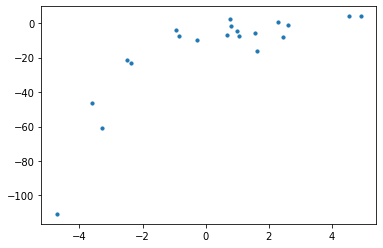

In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-5, 5, 20)
plt.scatter(x,y, s=10)
plt.show()

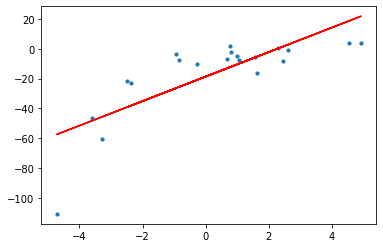

In [2]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:

In [3]:
rmse_s = np.sqrt(mean_squared_error(y, y_pred))
r2_s = r2_score(y, y_pred)
print('RMSE {} R2_score {}'.format(rmse_s,r2_s))

RMSE 16.924817575403132 R2_score 0.6049187123282771


In [4]:
X = x
y = y
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     27.56
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           5.42e-05
Time:                        19:44:18   Log-Likelihood:                -84.954
No. Observations:                  20   AIC:                             173.9
Df Residuals:                      18   BIC:                             175.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.6612      4.015     -4.648      0.0

To overcome under-fitting, we need to increase the complexity of the model.

To generate a higher order equation we can add powers of the original features as new features. 

The linear model,

$$
Y=\theta_{0}+\theta_{1} x
$$

can be transformed to

$$
Y=\theta_{0}+\theta_{1} x+\theta_{2} x^{2}
$$

This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

To convert the original features into their higher order terms we will use the `PolynomialFeatures` class provided by `scikit-learn`. Next, we train the model using Linear Regression.

###### Degree 2: 
<p> Underfit, high bias, low variance </p>

RMSE 11.04399720194276 R2_score 0.8317748036823444


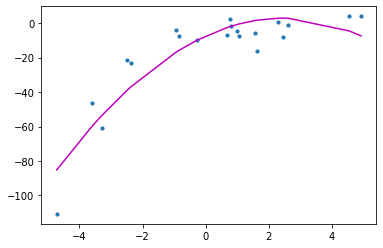

In [5]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse_s = np.sqrt(mean_squared_error(y,y_poly_pred))
r2_s = r2_score(y,y_poly_pred)
print('RMSE {} R2_score {}'.format(rmse_s,r2_s))


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
new_x, new_y_poly_pred = zip(*sorted_zip)
plt.plot(new_x, new_y_poly_pred, color='m')
plt.show()

It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line. 

We can see that RMSE has decreased and R²-score has increased as compared to the linear line.


If we try to fit a cubic curve (degree=3) to the dataset, we can see that it passes through more data points than the quadratic and the linear plots.


Then the linear model,

$$
Y=\theta_{0}+\theta_{1} x
$$

can be transformed to

$$
Y=\theta_{0}+\theta_{1} x+\theta_{2} x^{2}+\theta_{3} x^{3}
$$

###### Degree 3:
<p> Correct fit with low variance and low bias. </p>

RMSE 5.749825845681208 R2_score 0.9544017842288467


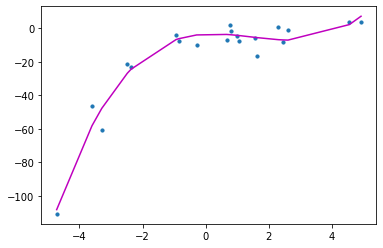

In [6]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse_s = np.sqrt(mean_squared_error(y,y_poly_pred))
r2_s = r2_score(y,y_poly_pred)
print('RMSE {} R2_score {}'.format(rmse_s,r2_s))


plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
new_x, new_y_poly_pred = zip(*sorted_zip)
plt.plot(new_x, new_y_poly_pred, color='m')
plt.show()

If we further increase the degree to 20, we can see that the curve passes through more data points

##### degree 20:
<p> Degree 20 covers most of the data points. However, this is a case of over fitting of data. Thereby, it will fail to generalize on unseen data.</p>
<p> To understand the best fit line, Bias vs Variance Trade off must be understood. </p>
    

RMSE 1.8559790555400046 R2_score 0.9952490046009707


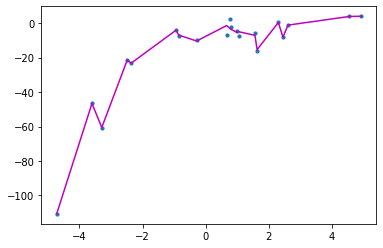

In [7]:
polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse_s = np.sqrt(mean_squared_error(y,y_poly_pred))
r2_s = r2_score(y,y_poly_pred)
print('RMSE {} R2_score {}'.format(rmse_s,r2_s))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
new_x, new_y_poly_pred = zip(*sorted_zip)
plt.plot(new_x, new_y_poly_pred, color='m')
plt.show()

For degree=20, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).
